**LIMPIEZA DE DATOS**

** 1.- SET DE DATOS DEL DATASET Google Maps metada-sitios

La informacion se encuentra en el df_finalt.json.
Consta de 279029 registros y 33 columnas.







In [1]:
##Importar librerias##
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter
from statistics import mode, StatisticsError
from wordcloud import WordCloud

In [21]:
##Lectura##
file_path_colab = '/content/drive/MyDrive/df_finalt.json'
df_finalt= pd.read_json(file_path_colab, orient='records', lines=True)

In [22]:
print(df_finalt.shape)
df_finalt.tail()

(279029, 33)


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,...,Crowd,From the business,Highlights,Planning,Recycling,Getting here,Activities,is_food_related,Lodging options,Health and safety
279024,Dunkin',"Dunkin', 7000 Chester Ave, Philadelphia, PA 19142",0x89c6c4072624d2a9:0x4437b2d55e9a5811,Long-running chain serving signature breakfast...,39.923594,-75.245269,"[Coffee shop, Bagel shop, Bakery, Breakfast re...",4.0,348,$,...,"[Family-friendly, Groups, Tourists]",,"[Fast service, Great coffee, Great tea selection]",,,,,True,,
279025,Munch,"Munch, 5285 Meadows Rd #188, Lake Oswego, OR 9...",0x54957330545fc915:0xd14f2cb33733fb2b,"Deli preparing breakfast, baked goods, sandwic...",45.418568,-122.730475,"[Deli, Coffee shop, Takeout Restaurant, Sandwi...",4.6,44,$,...,,[Identifies as women-led],[LGBTQ friendly],[Quick visit],,,,True,,
279026,Reuben's Marc,"Reuben's Marc, 8131 Stenton Ave, Philadelphia,...",0x89c6b993431d9a19:0xea378de3c317996e,,40.067534,-75.179153,"[Bar & grill, Bar]",4.0,223,$,...,,,,,,,,True,,
279027,Palm Gardens,"Palm Gardens, 52 Elm St, Cortland, NY 13045",0x89da6b8177ee49d5:0xbc9dfc53722fe1,,42.602261,-76.173393,[Bar & grill],4.0,128,$,...,[Groups],,"[Bar games, Fast service, Sports]",,,,,True,,
279028,Steak 48,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",0x89c6c74f43a49b55:0x6be6995921c58b12,,39.947254,-75.164953,"[Steak house, Fine dining restaurant, Seafood ...",4.6,308,,...,"[Groups, Tourists]",,"[Great dessert, LGBTQ friendly]","[Dinner reservations recommended, Accepts rese...",,,,True,,


In [23]:
#Revision de Valores Nulos#
df_finalt.isnull().sum()
df_finalt.isna().sum()
df_finalt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279029 entries, 0 to 279028
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               279029 non-null  object 
 1   address            279029 non-null  object 
 2   gmap_id            279029 non-null  object 
 3   description        279029 non-null  object 
 4   latitude           279029 non-null  float64
 5   longitude          279029 non-null  float64
 6   category           279029 non-null  object 
 7   avg_rating         279029 non-null  float64
 8   num_of_reviews     279029 non-null  int64  
 9   price              279029 non-null  object 
 10  hours              279029 non-null  object 
 11  state              279029 non-null  object 
 12  relative_results   279029 non-null  object 
 13  url                279029 non-null  object 
 14  Service options    279029 non-null  object 
 15  Accessibility      279029 non-null  object 
 16  Of

In [24]:
# Porcentaje de valores nulos#
total = df_finalt.isnull().sum().sort_values(ascending= False)
porcentaje_nulos = (df_finalt.isnull().sum() / df_finalt.isnull().count()).sort_values(ascending= False)
datos_faltantes = pd.concat([total,porcentaje_nulos], axis =1, keys = ['Total','Porcentaje'] )
print('-----------------------------',
'Los Datos Faltantes del datasets son: ',
total,
'-----------------------------',
'El % de Datos Faltantes del datasets son: ',
datos_faltantes[datos_faltantes['Total']>0],sep = '\n')

-----------------------------
Los Datos Faltantes del datasets son: 
Health and safety    100898
Lodging options      100898
Amenities                 0
is_food_related           0
Activities                0
Getting here              0
Recycling                 0
Planning                  0
Highlights                0
From the business         0
Crowd                     0
Dining options            0
Popular for               0
Health & safety           0
Payments                  0
Atmosphere                0
name                      0
address                   0
Accessibility             0
Service options           0
url                       0
relative_results          0
state                     0
hours                     0
price                     0
num_of_reviews            0
avg_rating                0
category                  0
longitude                 0
latitude                  0
description               0
gmap_id                   0
Offerings                 0
dtype: 

<Axes: >

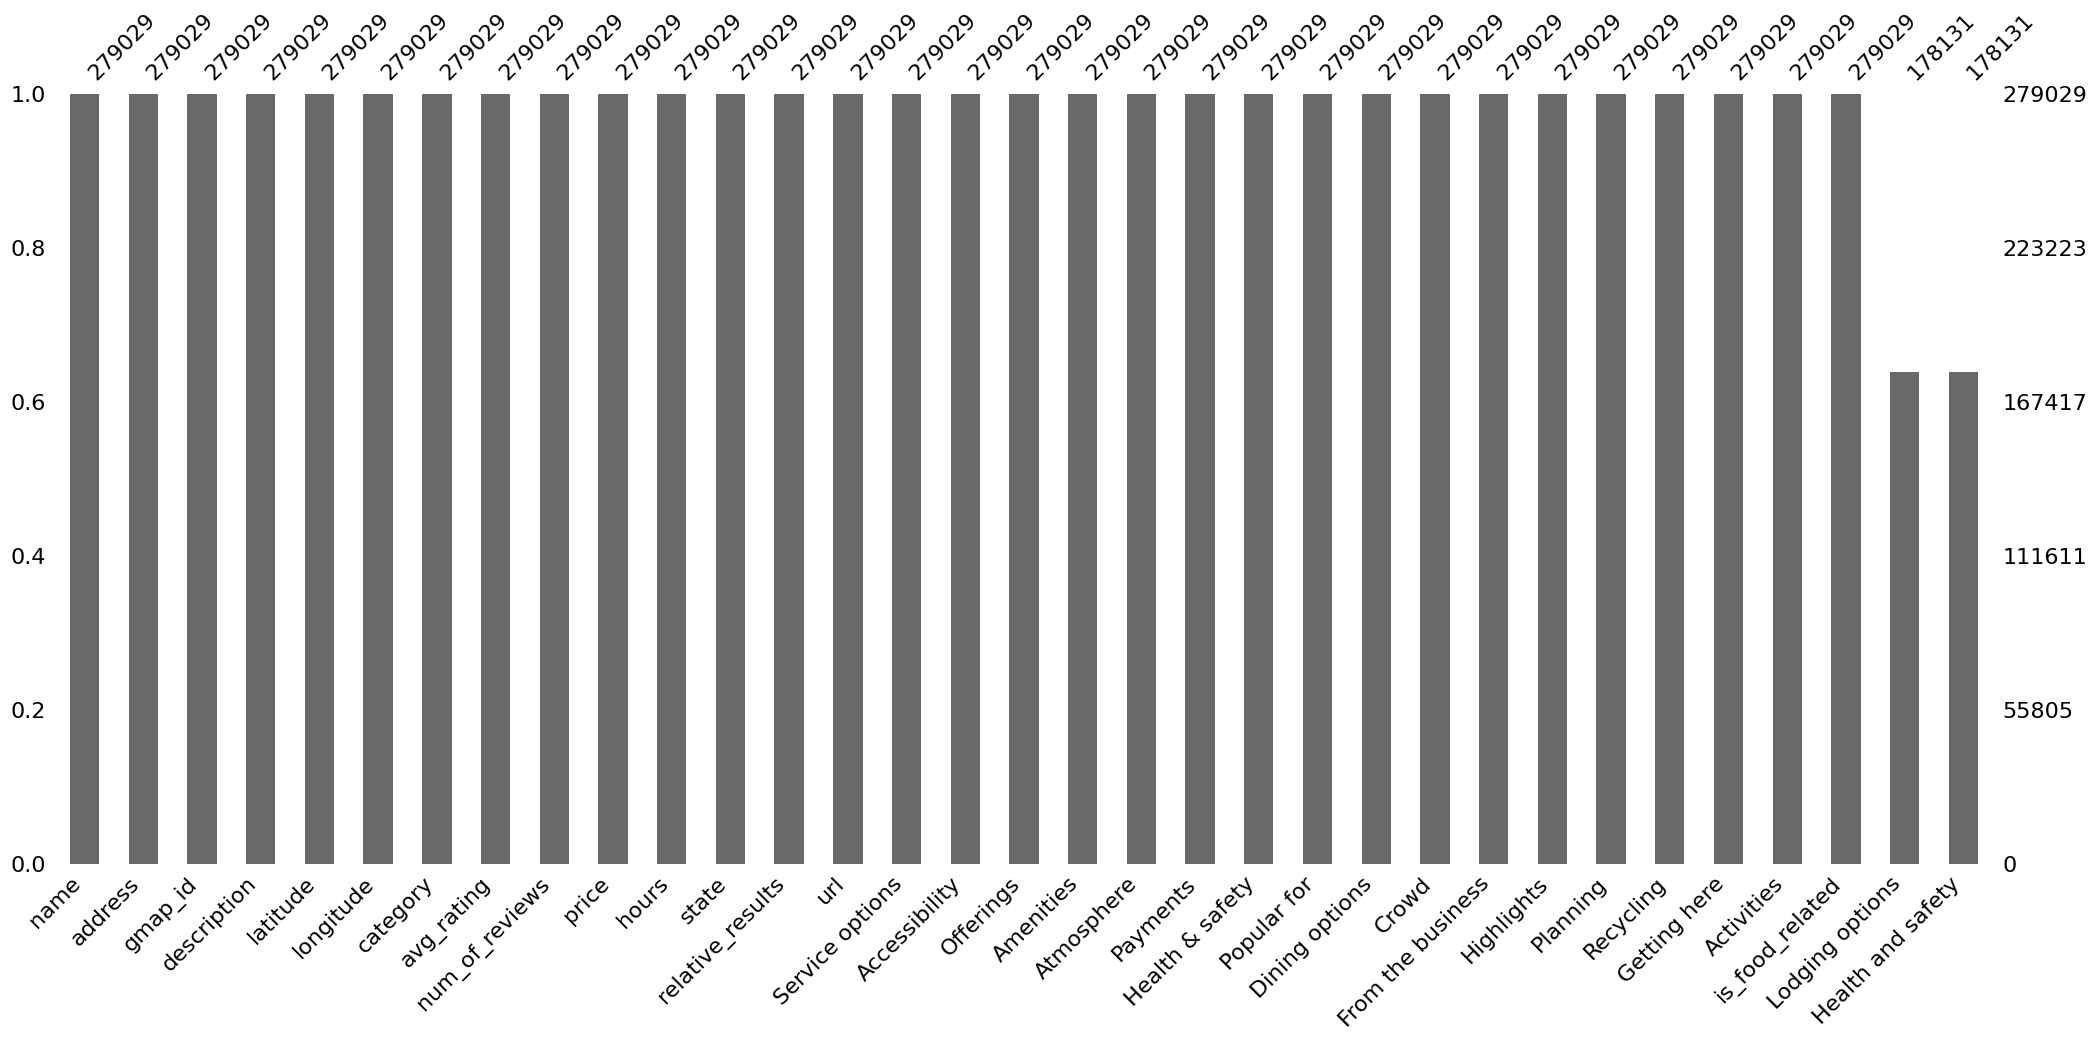

In [6]:
#Revisar los valores nulos con la libreria missingno
msno.bar(df_finalt)

In [25]:
# Eliminación de columnas con valores nulos
df_finalt.drop(['Health and safety', 'Lodging options'], axis=1, inplace=True)


In [26]:
##Imprime la información actualizada del DataFrame luego de eliminar las 2 columnas##
print(df_finalt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279029 entries, 0 to 279028
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name               279029 non-null  object 
 1   address            279029 non-null  object 
 2   gmap_id            279029 non-null  object 
 3   description        279029 non-null  object 
 4   latitude           279029 non-null  float64
 5   longitude          279029 non-null  float64
 6   category           279029 non-null  object 
 7   avg_rating         279029 non-null  float64
 8   num_of_reviews     279029 non-null  int64  
 9   price              279029 non-null  object 
 10  hours              279029 non-null  object 
 11  state              279029 non-null  object 
 12  relative_results   279029 non-null  object 
 13  url                279029 non-null  object 
 14  Service options    279029 non-null  object 
 15  Accessibility      279029 non-null  object 
 16  Of

In [27]:
# Reemplazo valores en blanco con NaN para poder trabajar con ellos
df_finalt.replace('', np.nan, inplace=True)



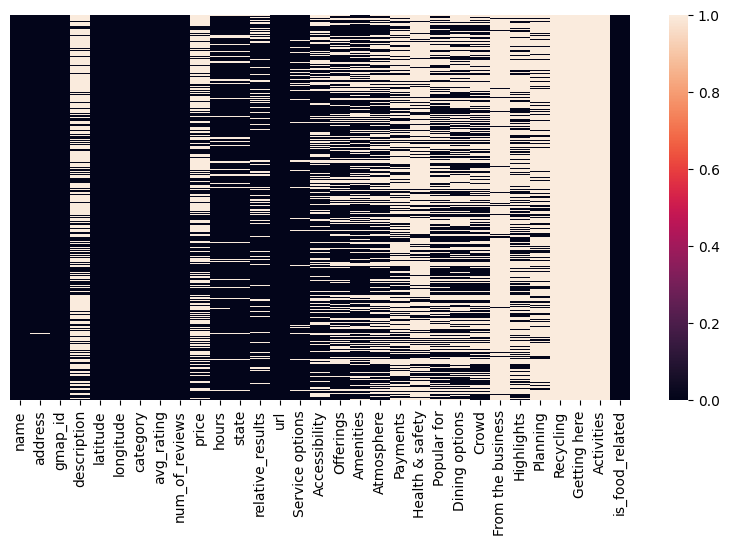

In [43]:
# graficar los valores NaN#
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(data=df_finalt.isnull(), yticklabels=False)

plt.show()

In [28]:
df_finalt.isnull().sum()

name                      0
address                2128
gmap_id                   0
description          191944
latitude                  0
longitude                 0
category                  0
avg_rating                0
num_of_reviews            0
price                157755
hours                 31226
state                 30154
relative_results      51613
url                       0
Service options       18156
Accessibility         91825
Offerings             88725
Amenities             90963
Atmosphere           114955
Payments             173165
Health & safety      216686
Popular for          132988
Dining options       143150
Crowd                147820
From the business    267866
Highlights           187252
Planning             225979
Recycling            278949
Getting here         279029
Activities           279025
is_food_related           0
dtype: int64

In [29]:
##Elimino columnas con valores nulos
df_finalt.drop(['description','Health & safety','From the business', 'Planning','Recycling', 'Getting here','Activities'], axis=1, inplace=True)

In [30]:
df_finalt.isnull().sum()

name                     0
address               2128
gmap_id                  0
latitude                 0
longitude                0
category                 0
avg_rating               0
num_of_reviews           0
price               157755
hours                31226
state                30154
relative_results     51613
url                      0
Service options      18156
Accessibility        91825
Offerings            88725
Amenities            90963
Atmosphere          114955
Payments            173165
Popular for         132988
Dining options      143150
Crowd               147820
Highlights          187252
is_food_related          0
dtype: int64

In [31]:
# Selecciona solo las columnas de tipo 'object'
object_columns = df_finalt.select_dtypes(include=['object']).columns

# # Reemplaza los NaN en esas columnas con 'No Disponible'
df_finalt[object_columns] = df_finalt[object_columns].fillna('No Disponible')


In [32]:
df_finalt.isnull().sum()

name                0
address             0
gmap_id             0
latitude            0
longitude           0
category            0
avg_rating          0
num_of_reviews      0
price               0
hours               0
state               0
relative_results    0
url                 0
Service options     0
Accessibility       0
Offerings           0
Amenities           0
Atmosphere          0
Payments            0
Popular for         0
Dining options      0
Crowd               0
Highlights          0
is_food_related     0
dtype: int64

In [33]:
#Verifico valores 'price'
print(df_finalt['price'].value_counts())


No Disponible    157755
$                 69833
$$                41890
₩₩                 3871
₩                  3754
$$$                1520
$$$$                193
₩₩₩                 177
₩₩₩₩                 36
Name: price, dtype: int64


In [34]:
df_finalt.isnull().sum()
df_finalt.isna().sum()

name                0
address             0
gmap_id             0
latitude            0
longitude           0
category            0
avg_rating          0
num_of_reviews      0
price               0
hours               0
state               0
relative_results    0
url                 0
Service options     0
Accessibility       0
Offerings           0
Amenities           0
Atmosphere          0
Payments            0
Popular for         0
Dining options      0
Crowd               0
Highlights          0
is_food_related     0
dtype: int64


# Transformación de la columna 'price'

# Transformación de la columna 'price'

Cada símbolo de dólar ('&dollar;') o won ('₩') representa un nivel de precio:

- <b>&dollar; o ₩:</b> Estos representan el nivel de precio más bajo. Podría ser un restaurante o un lugar donde puedes comprar algo por un precio relativamente bajo.

- <b>&dollar;&dollar; o ₩₩:</b> Estos representan un nivel de precio medio-bajo. Los lugares con este rango de precios son un poco más caros que los del nivel más bajo.

- <b>&dollar;&dollar;&dollar; o ₩₩₩:</b> Estos representan un nivel de precio medio-alto. Los lugares con este rango de precios son más caros que los de los dos niveles anteriores.

- <b>&dollar;&dollar;&dollar;&dollar; o ₩₩₩₩:</b> Estos representan el nivel de precio más alto. Los lugares con este rango de precios son los más caros, podrían ser restaurantes de lujo, tiendas de alta gama, etc.



In [35]:
# Definimos una función que transformará los valores de la columna 'price'
def transform_price(price):
    # Si el valor es 'No Disponible', lo convertimos en None
    if price == 'No Disponible':
        return 0
    # Si el valor es cualquier otra cosa (es decir, '$', '$$', etc.),
    # lo convertimos en un número que representa la cantidad de símbolos
    else:
        return len(price)

# Aplicamos la función a la columna 'price' en el DataFrame
# Esto creará una nueva columna con los precios transformados
df_finalt['price'] = df_finalt['price'].apply(transform_price)

# Imprimimos los nuevos valores de la columna 'price' para verificar la transformación
print(df_finalt['price'].value_counts())


0    157755
1     73587
2     45761
3      1697
4       229
Name: price, dtype: int64


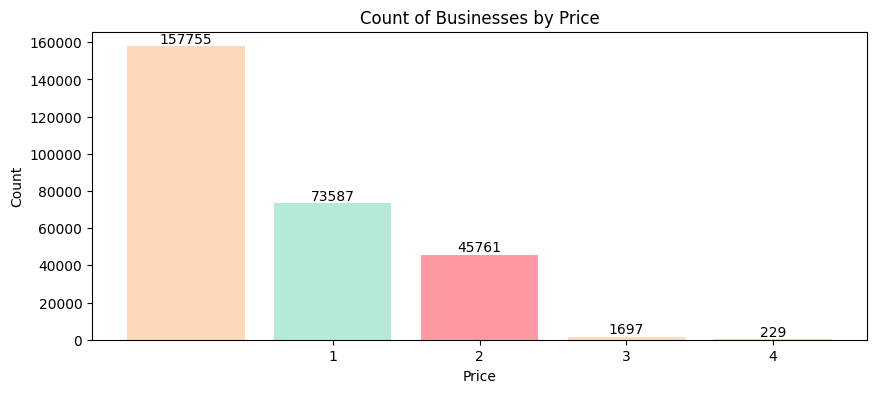

In [36]:
# Obtiene los conteos de 'price'
conteo_price = df_finalt['price'].value_counts()

# Crea el gráfico de barras
plt.figure(figsize=(10,4), dpi=100)
bars = plt.bar(conteo_price.index, conteo_price.values, color=['#FED9B7', '#B5EAD7', '#FF9AA2', '#FFDAC1'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Count of Businesses by Price')
plt.xticks([1, 2, 3, 4])  # Asegura que todos los precios se muestren en el eje x

# Agrega las etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.05, int(yval), va='bottom', ha='center')  # va: vertical alignment, ha: horizontal alignment

plt.show()


In [37]:
# Verifico duplicados en la columna 'gmap_id'
df_finalt['gmap_id'].duplicated().value_counts()

False    277524
True       1505
Name: gmap_id, dtype: int64

In [38]:
# Asegúrate de que 'gmap_id' sea la columna por la que quieres eliminar duplicados
df_finalt = df_finalt.drop_duplicates(subset='gmap_id', keep='first')


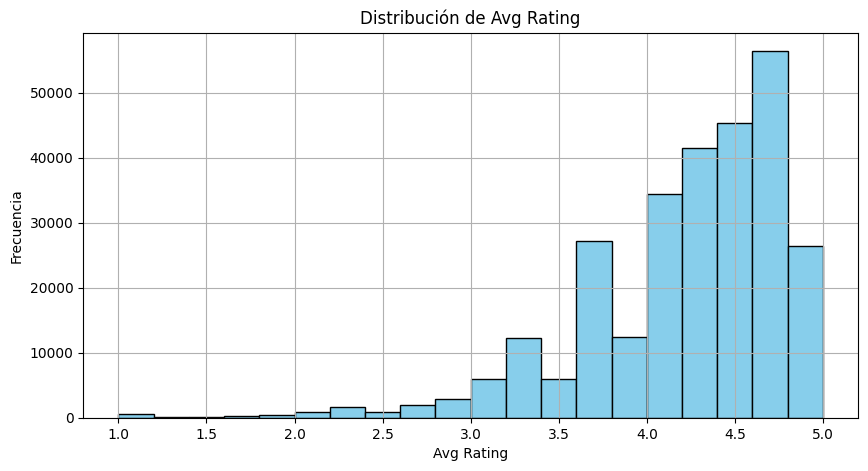

In [39]:
# Visualización de la distribución de avg_rating
plt.figure(figsize=(10, 5))
df_finalt['avg_rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Avg Rating')
plt.xlabel('Avg Rating')
plt.ylabel('Frecuencia')
plt.show()




In [40]:
df_finalt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277524 entries, 0 to 279028
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              277524 non-null  object 
 1   address           277524 non-null  object 
 2   gmap_id           277524 non-null  object 
 3   latitude          277524 non-null  float64
 4   longitude         277524 non-null  float64
 5   category          277524 non-null  object 
 6   avg_rating        277524 non-null  float64
 7   num_of_reviews    277524 non-null  int64  
 8   price             277524 non-null  int64  
 9   hours             277524 non-null  object 
 10  state             277524 non-null  object 
 11  relative_results  277524 non-null  object 
 12  url               277524 non-null  object 
 13  Service options   277524 non-null  object 
 14  Accessibility     277524 non-null  object 
 15  Offerings         277524 non-null  object 
 16  Amenities         27

In [41]:
# Estadísticas descriptivas
descripcion_estadistica = df_finalt[['avg_rating', 'num_of_reviews', 'price']].describe()
print(descripcion_estadistica)

          avg_rating  num_of_reviews          price
count  277524.000000   277524.000000  277524.000000
mean        4.199839       98.522002       0.614696
std         0.585637      270.169579       0.782300
min         1.000000        1.000000       0.000000
25%         3.900000       15.000000       0.000000
50%         4.300000       38.000000       0.000000
75%         4.600000       86.000000       1.000000
max         5.000000     9998.000000       4.000000


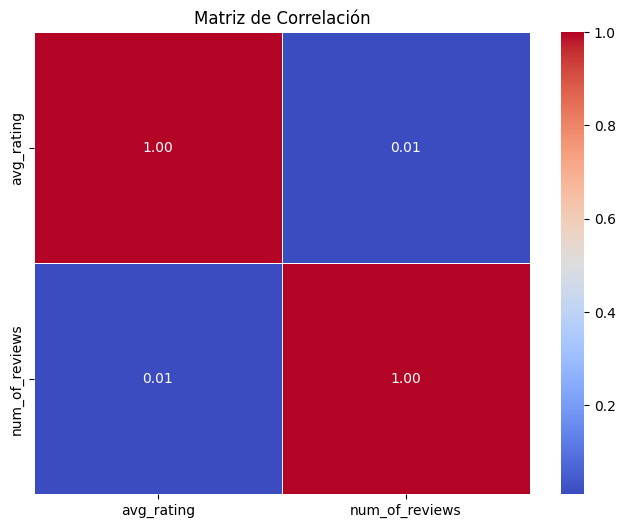

In [42]:
# Matriz de correlación
correlacion = df_finalt[['avg_rating', 'num_of_reviews', ]].corr(numeric_only=True)


# Visualizar matriz de correlación

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


In [43]:
print(df_finalt.loc[:, 'category'])


0                                       [Korean restaurant]
1                                              [Restaurant]
2                          [Bakery, Health food restaurant]
3                                              [Restaurant]
4         [Bicycle Shop, Bicycle repair shop, Coffee sho...
                                ...                        
279024    [Coffee shop, Bagel shop, Bakery, Breakfast re...
279025    [Deli, Coffee shop, Takeout Restaurant, Sandwi...
279026                                   [Bar & grill, Bar]
279027                                        [Bar & grill]
279028    [Steak house, Fine dining restaurant, Seafood ...
Name: category, Length: 277524, dtype: object


In [44]:
conteo_categorias = df_finalt['category'].explode().value_counts()
print(conteo_categorias)


Restaurant                  96738
Fast food restaurant        28686
Coffee shop                 25220
Takeout Restaurant          23833
Pizza restaurant            23721
                            ...  
Scooter rental service          1
Home cinema installation        1
Rugby                           1
Battery manufacturer            1
Sports medicine clinic          1
Name: category, Length: 2519, dtype: int64


In [45]:
conteo_categorias.head()

Restaurant              96738
Fast food restaurant    28686
Coffee shop             25220
Takeout Restaurant      23833
Pizza restaurant        23721
Name: category, dtype: int64

In [29]:
num_categorias = df_finalt['category'].apply(len).sum()
print(f"El número total de categorías en la columna 'category' es {num_categorias}")

El número total de categorías en la columna 'category' es 696020


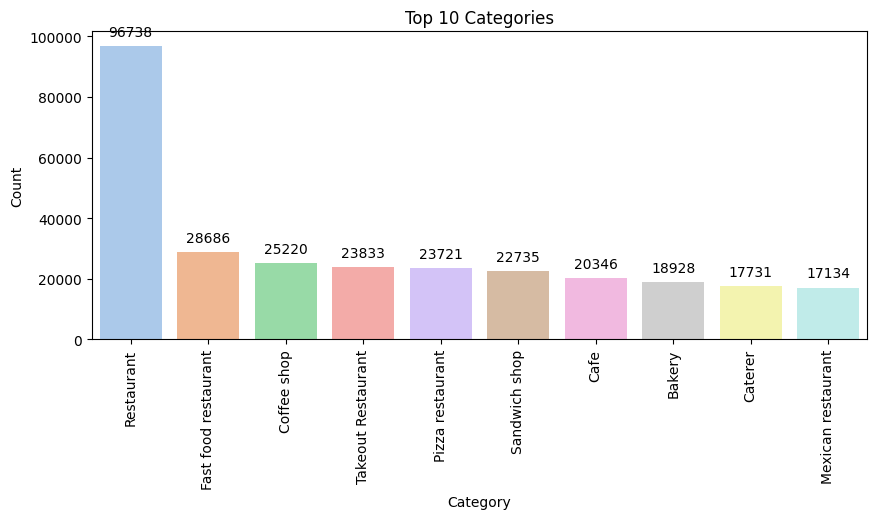

In [46]:
# Calcula el conteo de categorías
conteo_categorias = df_finalt['category'].explode().value_counts()

# Obtiene el top 10
top_10_categorias = conteo_categorias.nlargest(10)

# Crea el gráfico de barras
plt.figure(figsize=(10,4), dpi=100)
barplot = sns.barplot(x=top_10_categorias.index, y=top_10_categorias.values, palette='pastel')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Categories')

# Agrega las etiquetas a cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles
plt.show()


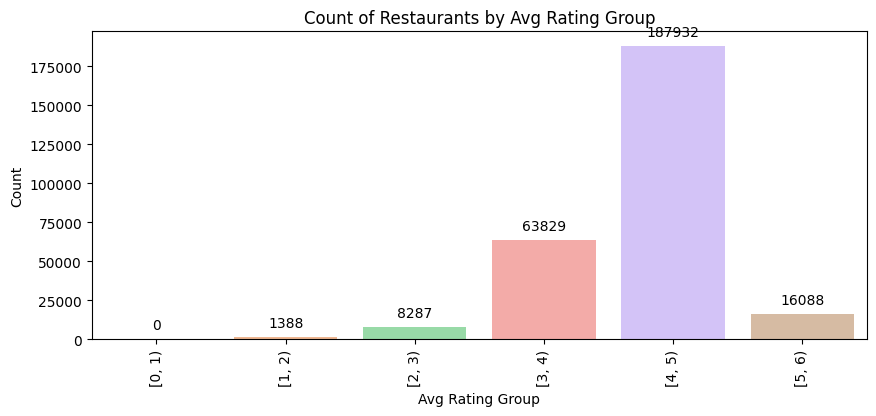

In [47]:
# Define los límites de los grupos
bins = np.arange(0, 7, 1)

# Crea los grupos
df_finalt['rating_group'] = pd.cut(df_finalt['avg_rating'], bins=bins, include_lowest=True, right=False)

# Cuenta los valores en cada grupo
conteo_grupos = df_finalt['rating_group'].value_counts().sort_index()

# Crea el gráfico de barras
plt.figure(figsize=(10,4), dpi=100)
barplot = sns.barplot(x=conteo_grupos.index.astype(str), y=conteo_grupos.values, palette='pastel')
plt.xlabel('Avg Rating Group')
plt.ylabel('Count')
plt.title('Count of Restaurants by Avg Rating Group')

# Agrega las etiquetas a cada barra
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles
plt.show()



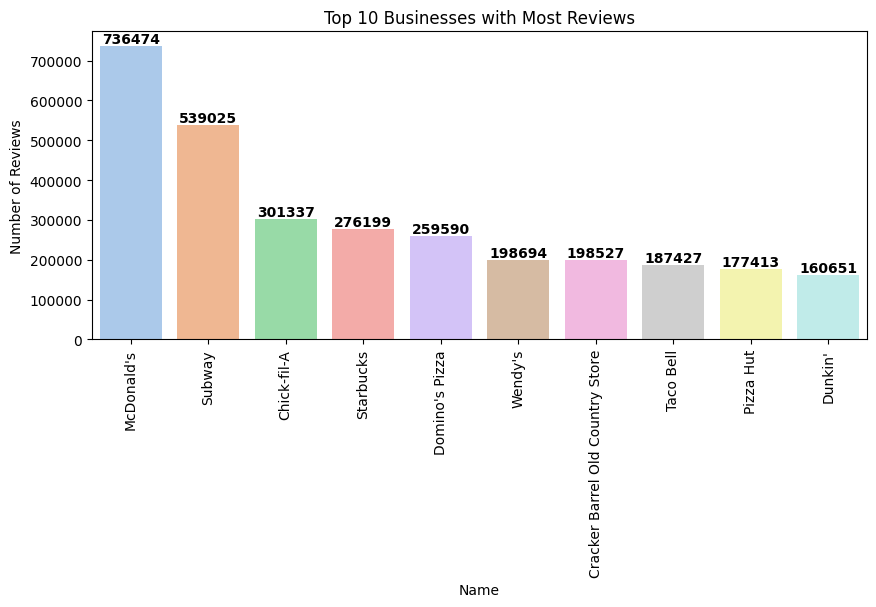

In [48]:
# Agrupa por 'name' y suma 'num_of_reviews'
conteo_reviews = df_finalt.groupby('name')['num_of_reviews'].sum()

# Obtiene el top 10
top_10_reviews = conteo_reviews.nlargest(10)

# Crea el gráfico de barras
plt.figure(figsize=(10,4), dpi=100)
barplot = sns.barplot(x=top_10_reviews.index, y=top_10_reviews.values, palette='pastel')
plt.xlabel('Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Businesses with Most Reviews')

# Agrega las etiquetas a cada barra
for i, v in enumerate(top_10_reviews.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom', fontweight='bold')

plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles
plt.show()



In [50]:
##Encuentra los valores atípicos:##

# Calcula los Z-Scores
z_scores = np.abs(stats.zscore(df_finalt[['avg_rating', 'num_of_reviews', 'latitude', 'longitude']]))

# Crea un DataFrame con los Z-Scores
df_z_scores = pd.DataFrame(z_scores, columns=['avg_rating', 'num_of_reviews', 'latitude', 'longitude'])

# Encuentra los valores atípicos
outliers = df_z_scores[(df_z_scores > 3).any(axis=1)]

# Imprime los Z-Scores de los valores atípicos
print(outliers)



        avg_rating  num_of_reviews  latitude  longitude
5         0.341785        0.298043  2.912881   3.766999
8         1.366313        0.342460  3.056816   3.685595
9         1.024804        0.335057  3.050356   3.682547
38        5.463874        0.360967  0.318302   0.132345
50        1.366313        0.360967  2.976585   3.762577
...            ...             ...       ...        ...
278742    0.511988        0.109109  2.971779   3.772351
278745    0.341785        0.149988  2.968181   3.765481
278747    0.170479        0.268432  2.905790   3.768520
278748    0.511988        0.264731  2.968783   3.774524
278984    3.073309        0.261029  0.838451   0.251839

[11887 rows x 4 columns]


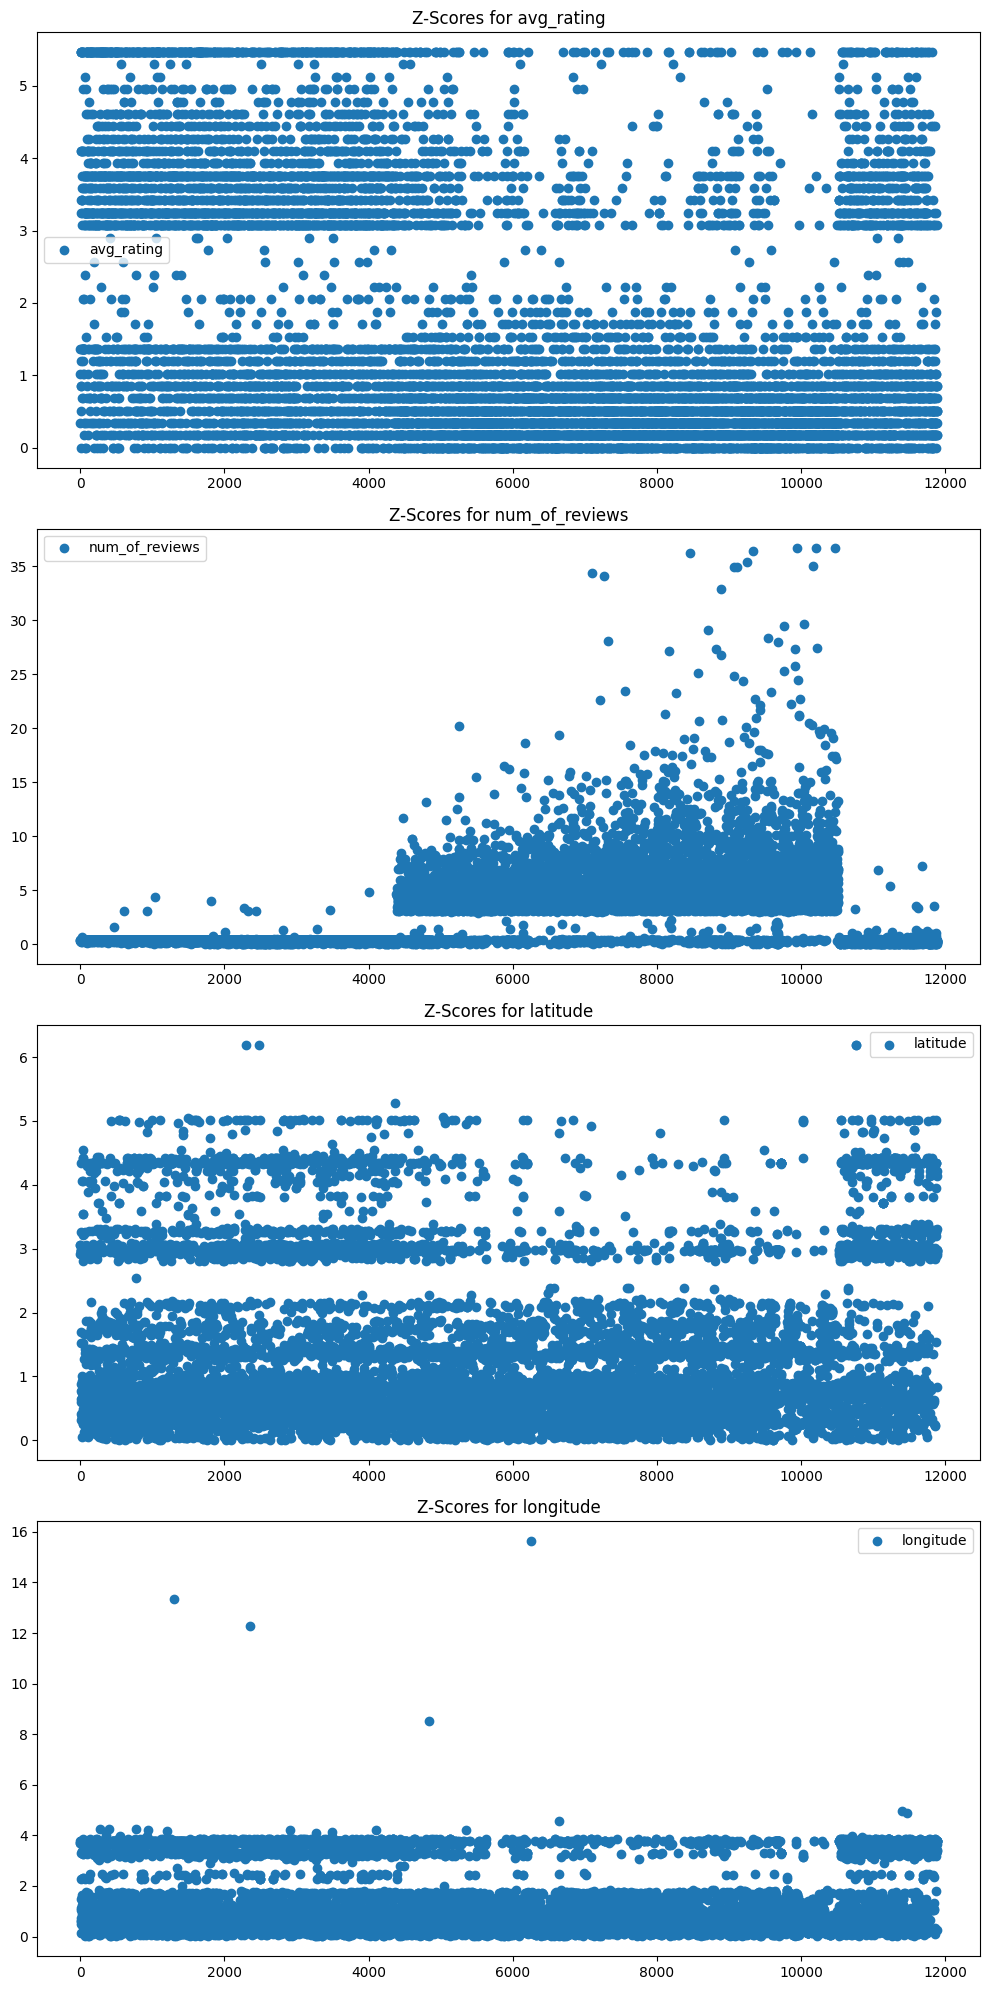

In [51]:
## Visualizacion de los valores atípicos:

fig, axs = plt.subplots(4, figsize=(10,20))

# Gráfico de dispersión para 'avg_rating'
axs[0].scatter(range(len(outliers)), outliers['avg_rating'], label='avg_rating')
axs[0].legend()
axs[0].set_title('Z-Scores for avg_rating')

# Gráfico de dispersión para 'num_of_reviews'
axs[1].scatter(range(len(outliers)), outliers['num_of_reviews'], label='num_of_reviews')
axs[1].legend()
axs[1].set_title('Z-Scores for num_of_reviews')

# Gráfico de dispersión para 'latitude'
axs[2].scatter(range(len(outliers)), outliers['latitude'], label='latitude')
axs[2].legend()
axs[2].set_title('Z-Scores for latitude')

# Gráfico de dispersión para 'longitude'
axs[3].scatter(range(len(outliers)), outliers['longitude'], label='longitude')
axs[3].legend()
axs[3].set_title('Z-Scores for longitude')

plt.tight_layout()
plt.show()



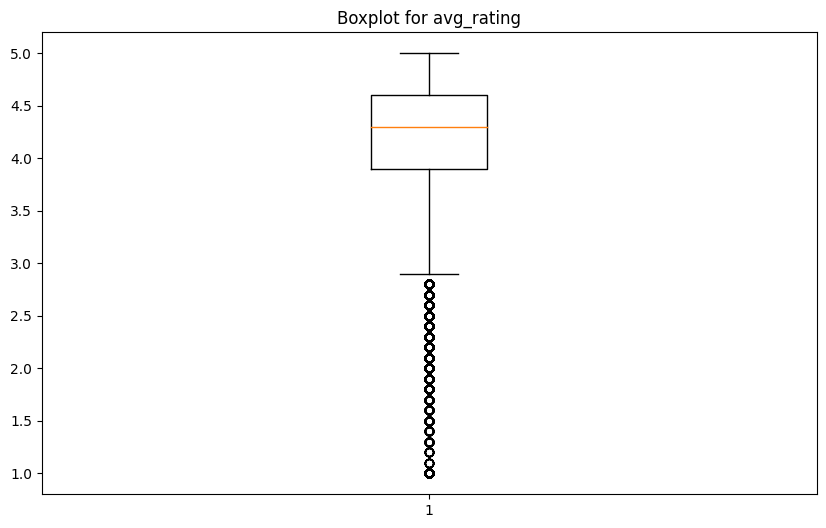

In [52]:
# Crea un gráfico de caja para 'avg_rating'
plt.figure(figsize=(10,6))
plt.boxplot(df_finalt['avg_rating'])
plt.title('Boxplot for avg_rating')
plt.show()


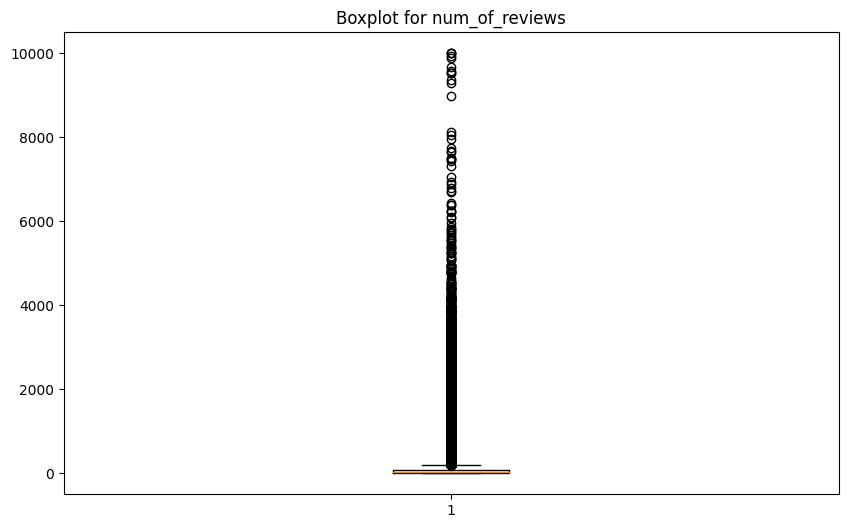

In [53]:
# Crea un gráfico de caja para 'num_of_reviews'
plt.figure(figsize=(10,6))
plt.boxplot(df_finalt['num_of_reviews'])
plt.title('Boxplot for num_of_reviews')
plt.show()

**###Análisis Inicial del Conjunto de Datos###**

El conjunto de datos se encuentra en el archivo ‘df_finalt.json’, el cual consta de 279029 registros y 24 columnas.

**Limpieza de Datos**

Se eliminaron las columnas:
 ‘Lodging options’ y ‘Health and safety’ debido a la alta cantidad de datos faltantes.

El % de Datos Faltantes del datasets son:
                    Total  Porcentaje
Health and safety  100898    0.361604
Lodging options    100898    0.361604

Los valores en blanco se reemplazaron con NaN para facilitar su manejo.

Además, se eliminaron las columnas:

 ‘description’, ‘Health & safety’, ‘From the business’, ‘Planning’, ‘Recycling’, ‘Getting here’, y ‘Activities’, ya que todos sus valores eran nulos. Los datos NaN de tipo object se reemplazaron por el texto ‘No Disponible’.

 Se transformo la columna 'price'.

Cada símbolo de dólar ('$') o won ('₩') representa un nivel de precio:

$ o ₩: Estos representan el nivel de precio más bajo. Podría ser un restaurante o un lugar donde puedes comprar algo por un precio relativamente bajo.

$$ o ₩₩: Estos representan un nivel de precio medio-bajo. Los lugares con este rango de precios son un poco más caros que los del nivel más bajo.

$$$ o ₩₩₩: Estos representan un nivel de precio medio-alto. Los lugares con este rango de precios son más caros que los de los dos niveles anteriores.

$$$$ o ₩₩₩₩: Estos representan el nivel de precio más alto. Los lugares con este rango de precios son los más caros, podrían ser restaurantes de lujo, tiendas de alta gama, etc.

**Manejo de Duplicados**

Se verificaron los duplicados en la columna ‘gmap_id’ y se eliminaron.

 **Análisis Descriptivo**

Se transformo la columna 'price'. Cada símbolo de dólar ('$') o won ('₩') representa un nivel de precio.

Luego, se visualizó la distribución de ‘avg_rating’, ‘num_of_reviews’, y ‘price’.

**Análisis de Categoría**
Se calculó el conteo de categorías. Se obtienen 699405 distribuidos así:
se muestran el Top 10.
Restaurant              97257
Fast food restaurant    28799
Coffee shop             25361
Takeout Restaurant      23915
Pizza restaurant        23814

Se encuentra los valores atípicos y se grafican para futuro tratamiento
en el modelo de ML y analisi de sentimeinto.

**Observaciones Finales**

Es importante destacar que el mayor número de restaurantes se encuentran entre el rating de 3 a 5 y se obtuvieron los 10 negocios con mayor número de reviews.

In [55]:
#Revision de Valores Nulos#
df_finalt.isnull().sum()
df_finalt.isna().sum()
df_finalt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277524 entries, 0 to 279028
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   name              277524 non-null  object  
 1   address           277524 non-null  object  
 2   gmap_id           277524 non-null  object  
 3   latitude          277524 non-null  float64 
 4   longitude         277524 non-null  float64 
 5   category          277524 non-null  object  
 6   avg_rating        277524 non-null  float64 
 7   num_of_reviews    277524 non-null  int64   
 8   price             277524 non-null  int64   
 9   hours             277524 non-null  object  
 10  state             277524 non-null  object  
 11  relative_results  277524 non-null  object  
 12  url               277524 non-null  object  
 13  Service options   277524 non-null  object  
 14  Accessibility     277524 non-null  object  
 15  Offerings         277524 non-null  object  
 16  Am

In [57]:
df_finalt.to_json("/content/drive/MyDrive/df.finalt_metadatos.json")

In [63]:
!gsutil cp /content/drive/MyDrive/df.finalt_metadatos.json gs://yelp-and-maps-data-processed/


Copying file:///content/drive/MyDrive/df.finalt_metadatos.json [Content-Type=application/json]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

| [1 files][344.1 MiB/344.1 MiB]                                                
Operation completed over 1 objects/344.1 MiB.                                    
